In [1]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import random
from scipy.stats import pearsonr
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
test_df = pd.read_table("lcp_single_test.tsv", keep_default_na=False, quoting=3)

In [4]:
test_df.head()

,id,corpus,sentence,token,complexity
0,3K8CQCU3KE19US5SN890DFPK3SANWR,bible,"But he, beckoning to them with his hand to be ...",hand,0.000000
1,3Q2T3FD0ON86LCI41NJYV3PN0BW3MV,bible,"If I forget you, Jerusalem, let my right hand ...",hand,0.197368
2,3ULIZ0H1VA5C32JJMKOTQ8Z4GUS51B,bible,"the ten sons of Haman the son of Hammedatha, t...",hand,0.200000
3,3BFF0DJK8XCEIOT30ZLBPPSRMZQTSD,bible,Let your hand be lifted up above your adversar...,hand,0.267857
4,3QREJ3J433XSBS8QMHAICCR0BQ1LKR,bible,"Abimelech chased him, and he fled before him, ...",entrance,0.000000


In [5]:
len(test_df)

917

In [6]:
random.seed(0)
random_test_indexes = random.sample(range(len(test_df)), 100)
random_test_indexes.sort()

In [7]:
test_df.iloc[random_test_indexes][["corpus", "sentence", "token", "complexity"]]

,corpus,sentence,token,complexity
1,bible,"If I forget you, Jerusalem, let my right hand ...",hand,0.197368
14,bible,Of Manasseh also there fell away some to David...,battle,0.236111
41,bible,"whose arrows are sharp, and all their bows bent.",arrows,0.142857
63,bible,I desire therefore that the men in every place...,pray,0.125000
64,bible,So shall they fear the name of Yahweh from the...,west,0.125000
...,...,...,...,...
870,europarl,This pipeline will transport the oil resources...,Caspian,0.366667
883,europarl,Adjournment of the session,Adjournment,0.412500
892,europarl,"Madam President, I am sure that Mr Gallagher a...",Herman,0.428571
903,europarl,I therefore urge that the rules on protection ...,abatement,0.486111


**Manually obtained predictions for the 100 data points in ChatGPT using few-shot template below, results saved in 'single_token_gpt_log.json**



```
Predict the lexical complexity score of a designated target word in the input sentence. Complexity is a continuous float value between 0 and 1.  Complexity scores are assigned as follows:
0 = "very easy",  a word which would be very familiar to a human annotator
0.25 = "easy", or a word with which an annotator would be aware of the meaning
0.5 = "neutral", a word which is neither difficult nor easy
0.75 = "difficult", a word where an annotator would be unclear of the meaning but may be able to infer the meaning from the sentence
1 = "very difficult", a word that an annotator would have never seen before, or would be very unclear
The predicted complexity should be closest to the appropriate score but may be any intermediate float value.
Output template: "Float value between 0 and 1"
Input: "The man, the lord of the land, said to us, By this I will know that you are honest men: leave one of your brothers with me, and take grain for the famine of your houses, and go your way."
Target word: "brothers"
Output: 0.04999999999999999
Input: "The king's wrath is like the roaring of a lion, but his favor is like dew on the grass."
Target word: "lion"
Output: 0.3157894736842105
Input: "He went and sent to Jehoshaphat the king of Judah, saying, The king of Moab has rebelled against me."
Target word: "Jehoshaphat"
Output: 0.609375
Input : "Transplanted cells were observed to proliferate, resulting in thousands of donor-derived erythrocytes 7 d later."
Target word: "thousands"
Output:  0.15000000000000002
Input: "As a consequence of the initial establishment of anterior-posterior positioned information within the limb by SHH and/or BMP signaling, the interdigital mesenchyme of the hand plate becomes specified in a graded manner."
Target word: "signaling"
Output:  0.5357142857142857
Input: "Detailed genetic studies in Drosophila and Caenorhabditis elegans have recently yielded evidence that basic phagocytic mechanisms and pathways for the recognition and engulfment of apoptotic cells are highly conserved throughout phylogeny [7,8]."
Target word: "Drosophila"
Output: 0.8611111111111112
Input: "Advancing African agriculture - Proposal for agricultural development and food security in Africa"
Target word: "agriculture"
Output: 0.15000000000000002
Input: "A corrigendum to the agenda of the sittings of 3 and 4 December, containing the proposals for changes made by the Groups, has been distributed."
Target word: "sittings"
Output: 0.36764705882352944
Input: "This morning, our committee presented its report on the European Ombudsman's report."
Target word: "Ombudsman"
Output: 0.6176470588235294
Input: "[Input sentence]"
Target word: "[Input token]"
Output:
```



In [8]:
results_df = pd.read_json('single_token_gpt_log.json')

In [9]:
results_df.head()

,test_point,test_data_row,corpus,sentence,token,gpt_input,actual_complexity,predicted_complexity
0,1,1,bible,"If I forget you, Jerusalem, let my right hand ...",hand,Predict the lexical complexity score of a desi...,0.197368,0.025
1,2,14,bible,Of Manasseh also there fell away some to David...,battle,Predict the lexical complexity score of a desi...,0.236111,0.125
2,3,41,bible,"whose arrows are sharp, and all their bows bent.",arrows,Predict the lexical complexity score of a desi...,0.142857,0.125
3,4,63,bible,I desire therefore that the men in every place...,pray,Predict the lexical complexity score of a desi...,0.125000,0.225
4,5,64,bible,So shall they fear the name of Yahweh from the...,west,Predict the lexical complexity score of a desi...,0.125000,0.250


In [10]:
pearsonr(results_df['actual_complexity'], results_df['predicted_complexity'])

PearsonRResult(statistic=0.6458431985464994, pvalue=4.0071515021646415e-13)

In [11]:
sklearn.metrics.r2_score(results_df['actual_complexity'], results_df['predicted_complexity'])

-0.6050249297631338

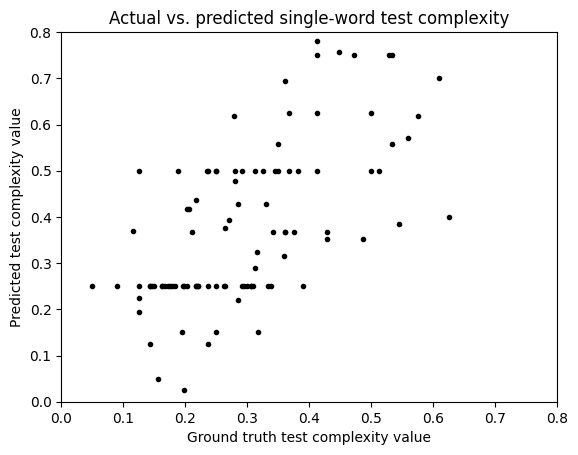

In [19]:
plt.plot(results_df['actual_complexity'], results_df['predicted_complexity'], 'k.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted single-word test complexity")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

In [13]:
bible_test_idx = np.where(results_df['corpus']=='bible')
biomed_test_idx = np.where(results_df['corpus']=='biomed')
europarl_test_idx = np.where(results_df['corpus']=='europarl')

In [14]:
print(pearsonr(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity']))
print(pearsonr(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity']))
print(pearsonr(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity']))

PearsonRResult(statistic=0.657965181349078, pvalue=0.00014157727815988544)
PearsonRResult(statistic=0.6870566024527279, pvalue=3.694143886154194e-06)
PearsonRResult(statistic=0.5236526014806775, pvalue=0.0010472373550877156)


In [15]:
print(sklearn.metrics.r2_score(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity']))
print(sklearn.metrics.r2_score(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity']))
print(sklearn.metrics.r2_score(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity']))

-1.4299644632036004
-0.2556768039652382
-0.949052121127866


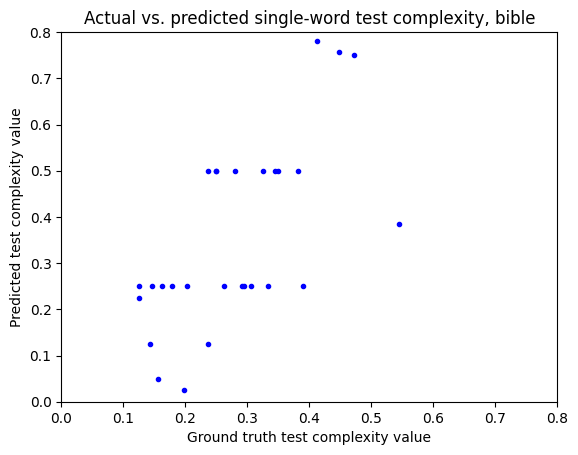

In [20]:
plt.plot(results_df.iloc[bible_test_idx]['actual_complexity'], results_df.iloc[bible_test_idx]['predicted_complexity'], 'b.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted single-word test complexity, bible")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

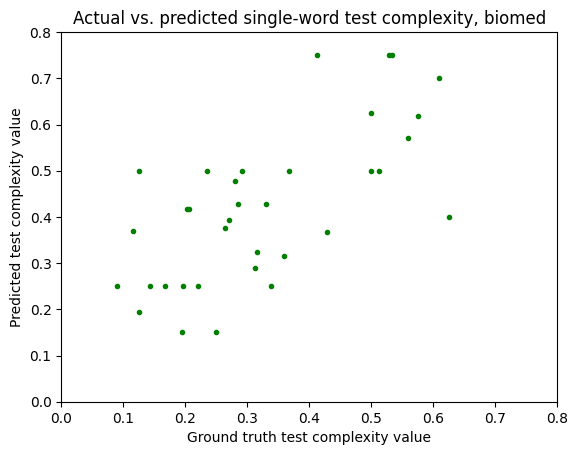

In [21]:
plt.plot(results_df.iloc[biomed_test_idx]['actual_complexity'], results_df.iloc[biomed_test_idx]['predicted_complexity'], 'g.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted single-word test complexity, biomed")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()

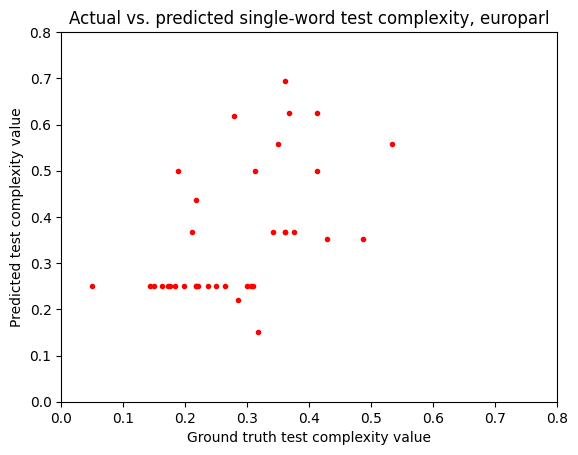

In [22]:
plt.plot(results_df.iloc[europarl_test_idx]['actual_complexity'], results_df.iloc[europarl_test_idx]['predicted_complexity'], 'r.')
plt.xlabel("Ground truth test complexity value")
plt.ylabel("Predicted test complexity value")
plt.title("Actual vs. predicted single-word test complexity, europarl")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.show()